# **Traffic Sign Recognition** 

## Writeup

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.



**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/visualization.jpg "Visualization"
[image2]: ./examples/grayscale.jpg "Grayscaling"
[image3]: ./examples/random_noise.jpg "Random Noise"
[image4]: ./examples/placeholder.png "Traffic Sign 1"
[image5]: ./examples/placeholder.png "Traffic Sign 2"
[image6]: ./examples/placeholder.png "Traffic Sign 3"
[image7]: ./examples/placeholder.png "Traffic Sign 4"
[image8]: ./examples/placeholder.png "Traffic Sign 5"


## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  


### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the pandas library to calculate summary statistics of the traffic
signs data set:

* The size of training set is 34799
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is (32,32,3)
* The number of unique classes/labels in the data set is 43


#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. 

My training images look like this->
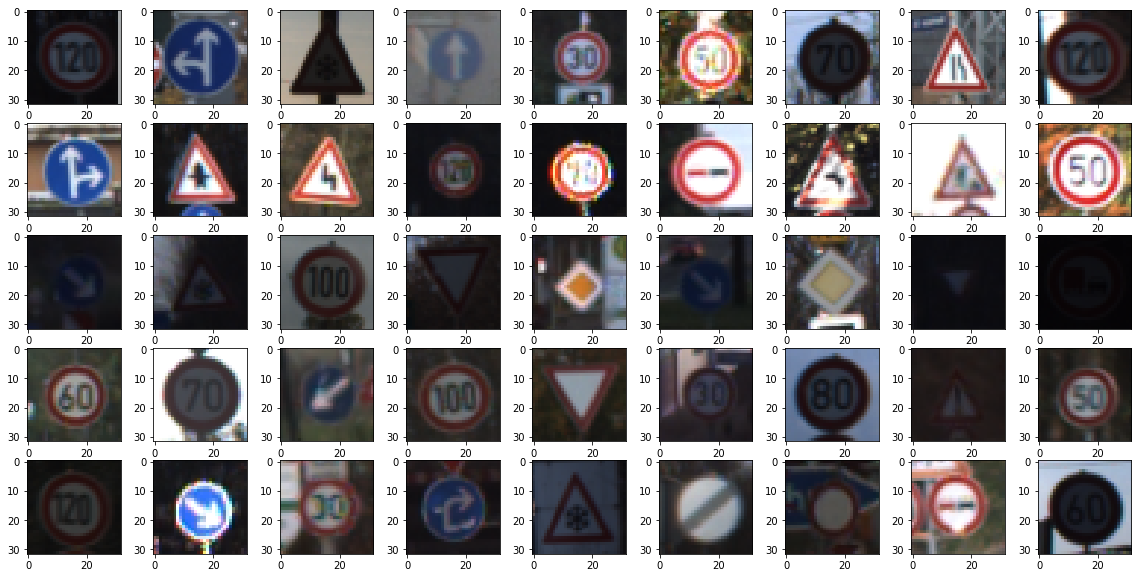


It is a bar chart showing distribution of my training data  
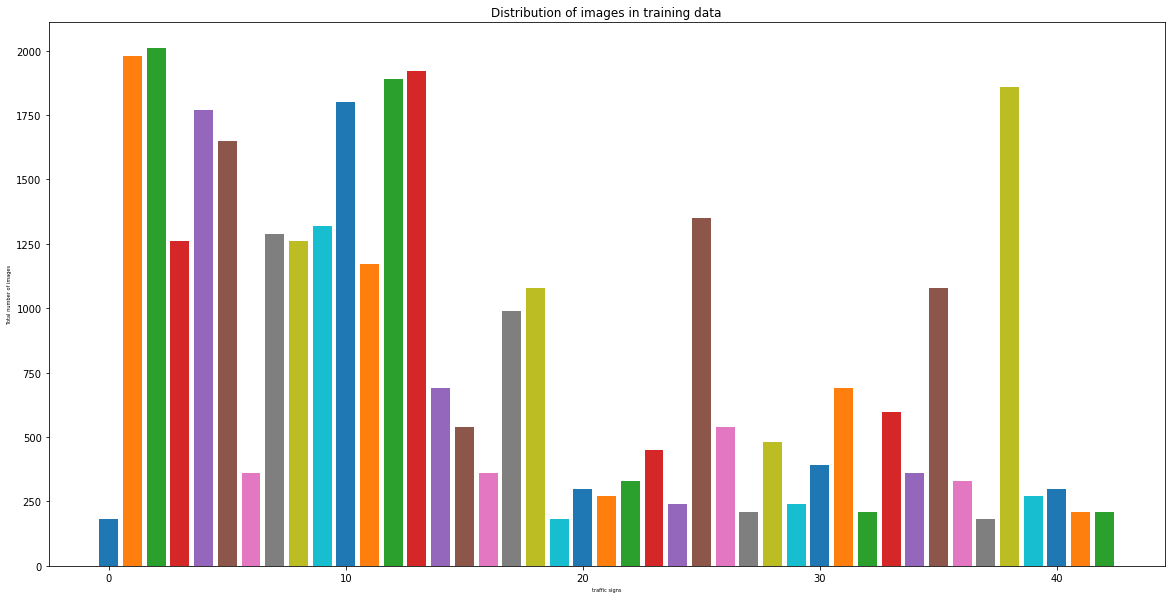

It is a bar chart showing distribution of my validation data

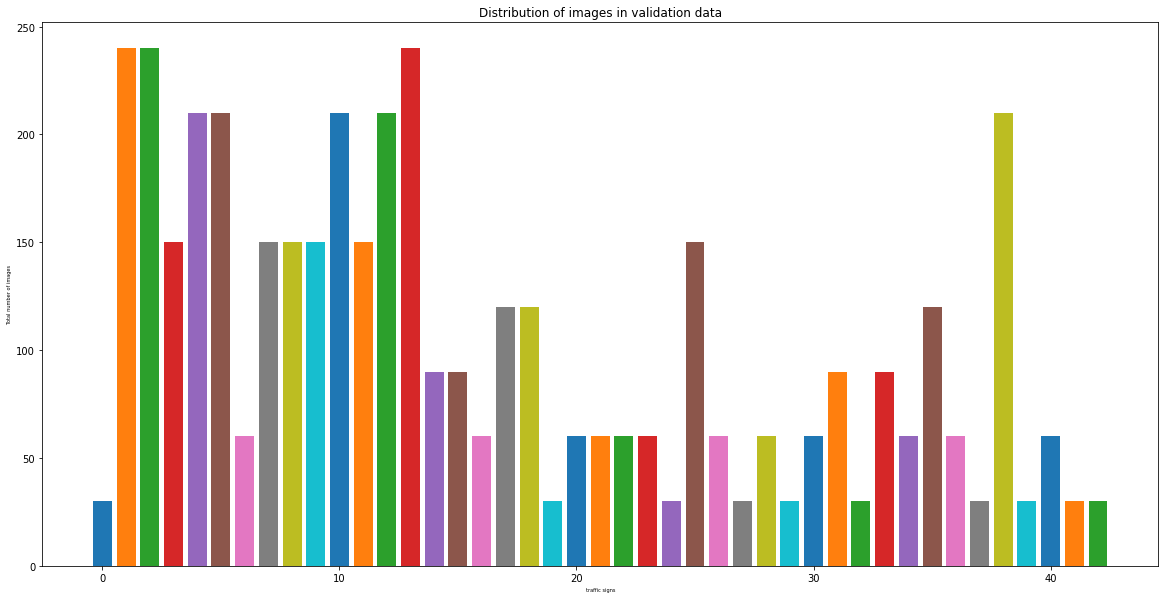


It is a bar chart showing distribution of my test data  

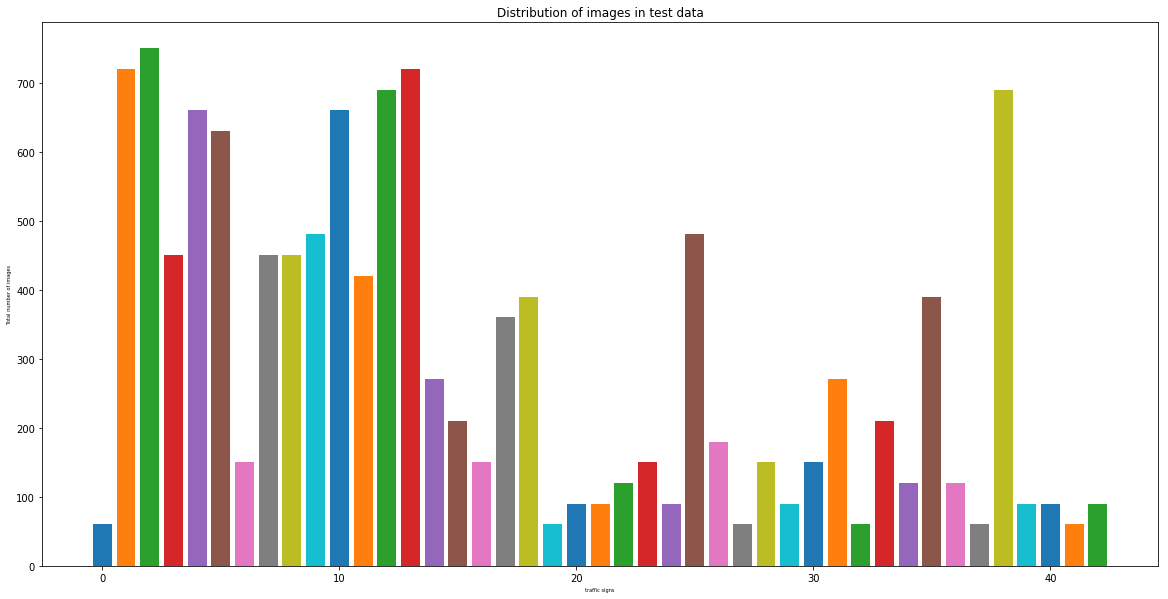

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a First Step , i have shuffled my training data to remove any sequencial pattern in dataset

As a Second step, I decided to convert the images to YIQ format .I used this technique to quantise my data into one channel 
so that my model will be computationally effective.
To convert into YIQ format first i have multiplied each channel with (.299,.587,.114) respectively and then add them as below

X_YIQ = 0.299*X_train[:,:,:,0] + 0.587*X_train[:,:,:,1] + 0.114*X_train[:,:,:,2]

then i reshaped each image to (32,32,1)

X_YIQ = X_YIQ.reshape(X_YIQ.shape + (1,))

and normalised each image like below

X_YIQ = (X_YIQ - 128.0) / 128.0

                    Left image is before preprocessing --- Right image after preprocessing



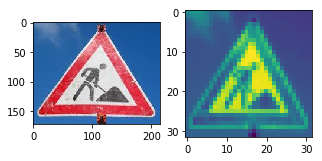




#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					|
|:---------------------:|:---------------------------------------------:|
| Input         		| 32x32x1 YIQ image   					|
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				    |
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 10x10x16   |
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16 				    |
| Dropout               | keep 80%                                      |
| Flatten				|												|
| Fully connected		| input 400, output 120        					|
| RELU					|												|
| Fully connected		| input 120, output 43        					|


 I have decided to go with deep model having 2 convolutional layers for extracting features and 2 fully connected 
 layer for classification into 43 categories.In between after final convolutional layer i have used dropout of 80% to avoid overfitting.


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.
I have set my parameters as below:
    optimiser : AdamOptimizer -> it is more efficent than Gaussian optimiser
    batch size : 128 -> As i am training on AWS there is no issue with the primary memory shortage so i took 128 batch size
    Epochs : 80 -> 80 is optimised epoch size for my model
    learning rate : 0.001

first of all i have loaded a batch of images and passed it to letnet function to get logits.Then i take out cross entropy of my logits.
After taking out mean on cross entropy i get loss and then i have passed my loss to AdamOptimiser to minimise it. 
I kept on doing this process for 80 Epochs and Finally my weights are optimised for my training data.



#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem



* training set accuracy of 100%
* validation set accuracy of  94.8% 
* test set accuracy of 94.3%

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?

I have tries the default Letnet architecture with 2 convolutional layers and 3 fully connected layers.

* What were some problems with the initial architecture?

The defualt network deoes not have any dropout and 3 fully connected layers are of no use when there are only 43 categories to 
classify.

* How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to overfitting or underfitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.

I have places a dropout with keep probability of 80% after second convolutional layer and i have removed second fully connected
layer and modifed the last fully connected layer by changing input parameter from 83 to 120

* Which parameters were tuned? How were they adjusted and why?

I have tuned dropout parameter(keep prob) to .80 ,so that my model dont get overfitted . I have also changed the input value of last fully connected to 120 because 
i have removed default second fully connected to optimise my model.

* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?

I have used 2 conolutional layer to extract features from images so that i can classify them by using fully connected layers.
I have also used dropout to reduce the chances of overfitting .I have used only 2 fully connected layers because they
are sufficient to classify 43 categories.Hence by using only 2 fully connected i have optimised my model.




### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:
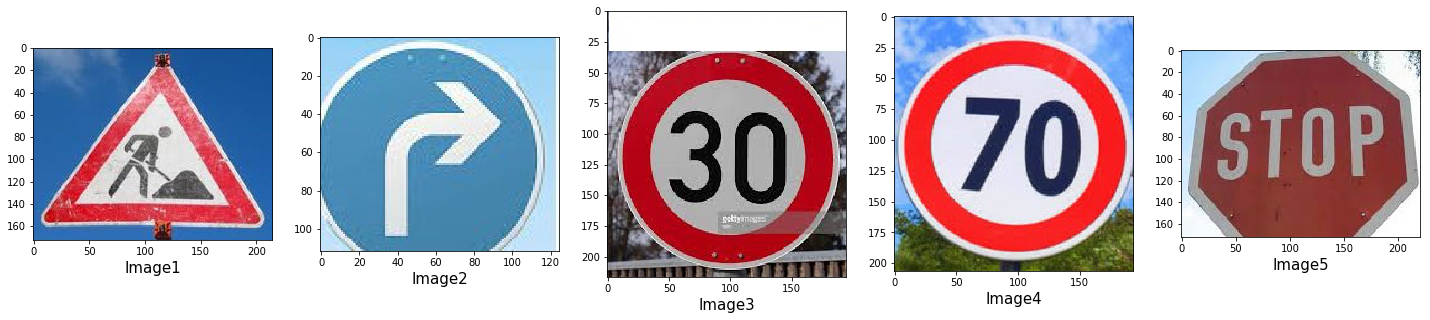

The third and fourth image might be difficult to classify because htese images have almost same shape and characteristics.In fourth image it usually gets confused with "speed limit 20" board sign.


#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

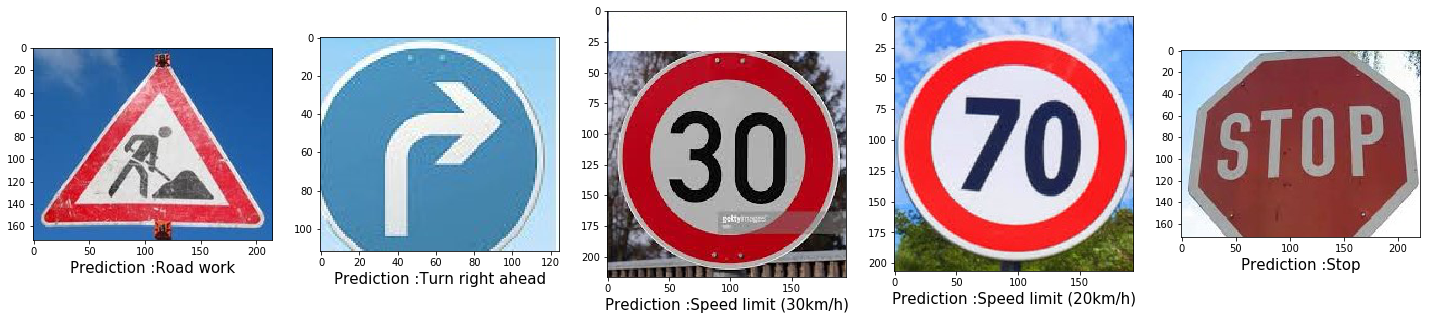
    
| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Road Work      		| Road Work   									| 
| Turn Right head  		| Turn Right head 								|
| Speed limit (30km/hr)	| Speed limit (30km/hr)							|
| Speed limit (70km/hr)	| Speed limit (20km/hr)			 				|
| Stop          		| Stop                 							|



The model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of 80%.This result seems like not accurately favours the test accuracy but i have tried only on 5 outside images ,so cannot comment that it does not favours the results. 


#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 14th cell of the Ipython notebook.

For the first image, the model is relatively sure that this is a  Road work sign (probability of 100%),the other probabilities are close to zero. The top five soft max probabilities were

Predictions for Image 1

| Probability     |     Prediction	   | 
|:---------------------:|:---------------------------------------------:| 
| 100.00      |     Road work
| 0.00        |     Road narrows on the right
| 0.00        |     Bicycles crossing
| 0.00        |     Dangerous curve to the right
| 0.00        |     Beware of ice/snow

For the second image, the model is relatively sure that this is a   Turn right ahead sign (probability of 100%),the other probabilities are close to zero. The top five soft max probabilities were

Predictions for Image 2

| Probability     |     Prediction	   | 
|:---------------------:|:---------------------------------------------:| 
| 100.00      |     Turn right ahead
| 0.00        |     Keep left
| 0.00        |     Yield
| 0.00        |     Road work
| 0.00        |     Speed limit (30km/h)

For the third image, the model is relatively sure that this is a   Speed limit (30km/h) sign (probability of 100%),the other probabilities are close to zero. The top five soft max probabilities were

Predictions for Image 3

| Probability     |     Prediction	   | 
|:---------------------:|:---------------------------------------------:|
| 100.00      |     Speed limit (30km/h)
| 0.00        |     Speed limit (20km/h)
| 0.00        |     Speed limit (70km/h)
| 0.00        |     Speed limit (80km/h)
| 0.00        |     Speed limit (50km/h)


For the fourth image, the model is relatively sure that this is a  Speed limit (20km/h) sign (probability of 92.82%)the second probability is Speed limit (30km/h) with (6%) and third one is Speed limit (70km/h) with (1,18) but this should be detected with highest probability ,the other probabilities are close to zero. The top five soft max probabilities were

Predictions for Image 4

| Probability     |     Prediction	   | 
|:---------------------:|:---------------------------------------------:|
| 92.82       |     Speed limit (20km/h)
| 6.00        |     Speed limit (30km/h)
| 1.18        |     Speed limit (70km/h)
| 0.00        |     End of speed limit (80km/h)
| 0.00        |     General caution


For the fifth image, the model is relatively sure that this is a   Stop sign (probability of 97.77%) and the second probability is 1.87% for Yield sign,the other probabilities are close to zero. The top five soft max probabilities were

Predictions for Image 5

| Probability     |     Prediction	   | 
|:---------------------:|:---------------------------------------------:|
| 97.77       |     Stop
| 1.87        |     Yield
| 0.31        |     Speed limit (30km/h)
| 0.04        |     Speed limit (50km/h)
| 0.00        |     Priority road
